<a href="https://colab.research.google.com/github/yenlung/Python-AI-Book/blob/main/%E5%86%92%E9%9A%AA34_%E7%B0%A1%E5%96%AE%E6%89%BE%E8%A1%A8%E7%A4%BA%E5%90%91%E9%87%8F%E7%9A%84%E6%96%B9%E6%B3%95_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical

### 1. 讀入MNIST資料集並進行資料預處理
老規矩，開場先發動覆蓋的魔法卡，召喚 MNIST 資料集

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [ ]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 3. 自編碼器的實作範例

我們考慮具有下列結構的 Autoencoder:

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=15YLGgg9DbiJjArWi6-IBssMSM5cxQmhg", width="80%"
   />
</p>


為了方便，我們將三個變數的符號表示出來：

$$ x \overset{\mbox{Enc}}{\mapsto} z \overset{\mbox{Dec}}{\mapsto} \hat{x} $$

In [ ]:
x = Input(shape=(784,))

In [ ]:
f1 = Dense(100, activation='sigmoid')
f2 = Dense(2, activation='sigmoid')
g1 = Dense(100, activation='sigmoid')
g2 = Dense(784, activation='sigmoid')

In [ ]:
h1 = f1(x)
z = f2(h1)
h2 = g1(z)
x_hat = g2(h2)

In [ ]:
autoencoder = Model(x, x_hat)

### 3. 組裝自己的神經網路

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
 dense_2 (Dense)             (None, 100)               300       
                                                                 
 dense_3 (Dense)             (None, 784)               79184     
                                                                 
Total params: 158,186
Trainable params: 158,186
Non-trainable params: 0
_________________________________________________________________


一樣的，當模型 compile 之後，便可以進行資料的訓練、預測等等，請有興趣的同學讀入 MNIST 手寫辨識之料後，自行完成這個模型的訓練。

In [ ]:
autoencoder.compile(loss='mse',
                    optimizer='adam',
                    )

In [ ]:
autoencoder.fit(x_train, x_train, 
                batch_size=100, 
                epochs=20,
                )

Epoch 1/20
600/600 [==============================] - 5s 6ms/step - loss: 0.0690
Epoch 2/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0674
Epoch 3/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0653
Epoch 4/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0611
Epoch 5/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0592
Epoch 6/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0559
Epoch 7/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0553
Epoch 8/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0550
Epoch 9/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0548
Epoch 10/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0546
Epoch 11/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0545
Epoch 12/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0543
Epoch 13/20
600/600 [====

### 4. 大中取小：編碼器Encoder

In [ ]:
Encoder = Model(x, z)

In [ ]:
Encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


### 5. 大中取小：解碼器Decoder

In [ ]:
z_input = Input(shape=(2,))

In [ ]:
h = g1(z_input)
x_reconstruct = g2(h)

In [ ]:
Decoder = Model(z_input, x_reconstruct)

In [ ]:
Decoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 100)               300       
                                                                 
 dense_3 (Dense)             (None, 784)               79184     
                                                                 
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


### 6. 編碼器Encoder的視覺化呈現

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def representation(x, y):
    y_pred = Encoder.predict(x)
    idx = np.random.randint(x.shape[0], size=1000)
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'lime', 'orange', 'purple']
    for label, c in enumerate(colors):
        label_idx = idx[y[idx]==label]
        plt.scatter(y_pred[label_idx, 0], y_pred[label_idx, 1], 
                    c=c, label=str(label))
    plt.legend();

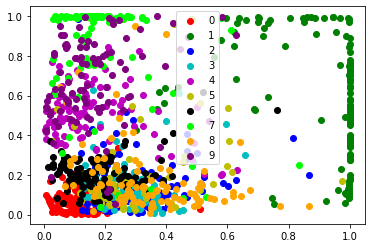

In [ ]:
representation(x_train, y_train.argmax(axis=-1))

### 7. 解碼器Decoder的應用-生成模型

In [ ]:
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(0, 1, n)
grid_y = np.linspace(0, 1, n)

In [ ]:
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[(n-i-1) * digit_size: (n - i) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

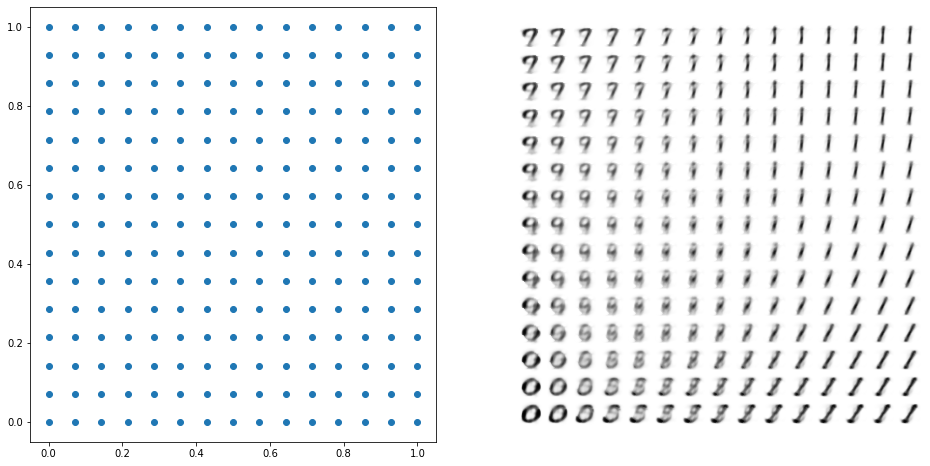

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
XX, YY = np.meshgrid(grid_x, grid_y)
plt.scatter(XX, YY)
 
plt.subplot(1, 2, 2)
plt.imshow(figure, cmap='Greys')
plt.axis('off');

### 8. 積小成大

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

In [ ]:
x = Input(shape=(784,))
f1 = Dense(100, activation='sigmoid')
f2 = Dense(2, activation='sigmoid')

In [ ]:
Encoder = Model(x, f2(f1(x)))
Decoder = Model(z, g2(g1(z)))

In [ ]:
another_autoencoder = Model(x, Decoder(Encoder(x)))

In [ ]:
another_autoencoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 model_5 (Functional)        (None, 2)                 78702     
                                                                 
 model_6 (Functional)        (None, 784)               79484     
                                                                 
Total params: 158,186
Trainable params: 158,186
Non-trainable params: 0
_________________________________________________________________
